In [60]:
#part 6
%matplotlib inline
%config InlineBackend.figure_format='retina'
import pandas as pd
import matplotlib.pyplot as plt 
from pandas.tools.plotting import scatter_matrix
from scipy import stats
from scipy.stats import uniform as sp_rand
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import *
from sklearn import model_selection
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import math
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  Ridge, ElasticNet
from sklearn.model_selection import RandomizedSearchCV

In [3]:
from Feature_Engineering import DfAfterFE

df = pd.read_csv('energydata_complete.csv')
df1 = DfAfterFE(df)
df1.feature_engineering()
new_df = df1.df
X = new_df.drop(columns=['date', 'Appliances', 'rv1', 'rv2'])
X.info()
y = new_df['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 35 columns):
lights                    19735 non-null int64
T1                        19735 non-null float64
RH_1                      19735 non-null float64
T2                        19735 non-null float64
RH_2                      19735 non-null float64
T3                        19735 non-null float64
RH_3                      19735 non-null float64
T4                        19735 non-null float64
RH_4                      19735 non-null float64
T5                        19735 non-null float64
RH_5                      19735 non-null float64
T6                        19735 non-null float64
RH_6                      19735 non-null float64
T7                        19735 non-null float64
RH_7                      19735 non-null float64
T8                        19735 non-null float64
RH_8                      19735 non-null float64
T9                        19735 non-null float64
RH_9       

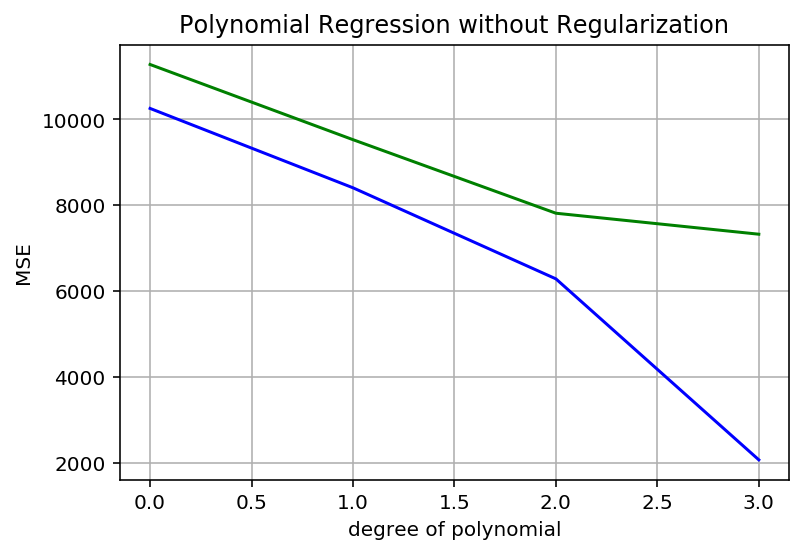

In [11]:
# Containers for noting down the MSE
train_mse_list = []
test_mse_list = []
degree_of_polynomial = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    # Transfer the X to a polynomial form by using fit_transform
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    lm = LinearRegression()
    lm.fit(X_train_, y_train)
    train_pred = lm.predict(X_train_)
    train_mse_list.append(mean_squared_error(y_train, train_pred))
    test_pred = lm.predict(X_test_)
    test_mse_list.append(mean_squared_error(y_test, test_pred))
    degree_of_polynomial.append(i)

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression without Regularization')
plt.plot(degree_of_polynomial, train_mse_list, '-b', degree_of_polynomial, test_mse_list, '-g')
plt.show()

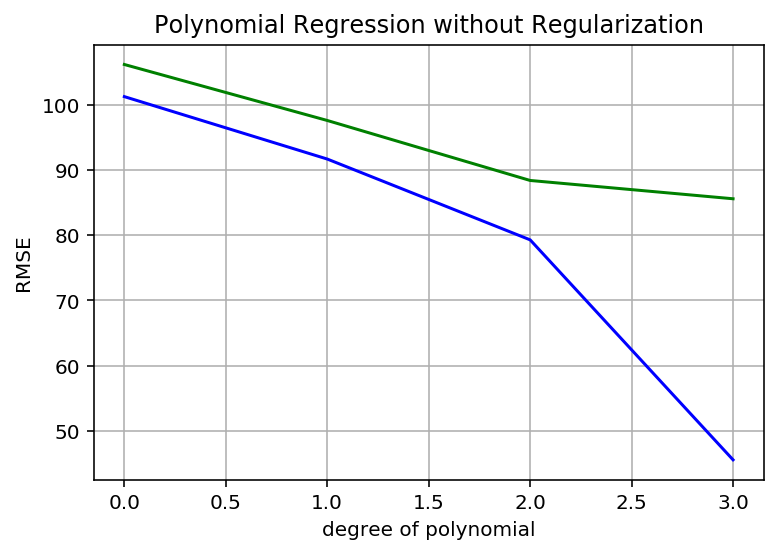

In [20]:
train_rmse_list = [math.sqrt(train_mse_list[i]) for i in range(len(train_mse_list))]
test_rmse_list = [math.sqrt(test_mse_list[i]) for i in range(len(test_mse_list))]

plt.xlabel('degree of polynomial')
plt.ylabel('RMSE')
plt.grid(True)
plt.title('Polynomial Regression without Regularization')
plt.plot(degree_of_polynomial, train_rmse_list, '-b', degree_of_polynomial, test_rmse_list, '-g')
plt.show()

In [33]:
print test_rmse_list

[106.19898883815813, 97.61009495449491, 88.40592874869466, 85.59798160541933]


# Lasso find a good alpha use cross validation

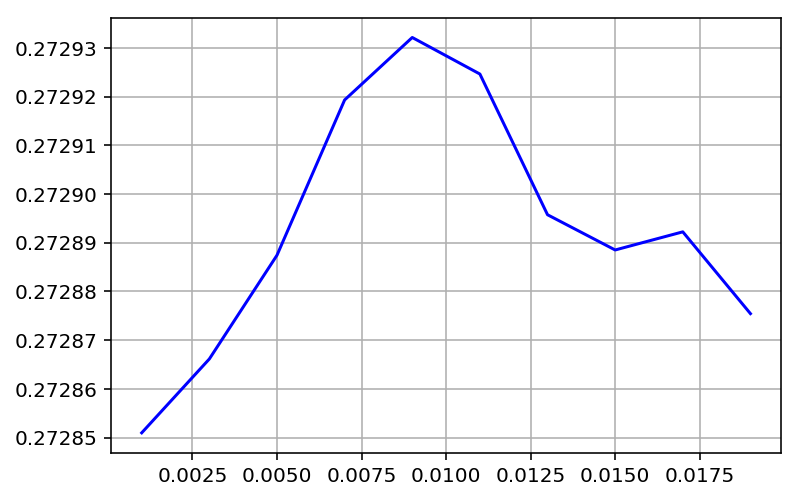

0.009000000000000001


In [34]:
model = PolynomialFeatures(degree=2)
X_train_ = model.fit_transform(X_train)
X_test_ = model.fit_transform(X_test)

scores_lasso = []
alphas_lasso = np.arange(0.001,0.02, 0.002)
for alpha in alphas_lasso:
    lasso = Lasso()
    lasso.alpha = alpha 
    this_score = np.mean(model_selection.cross_val_score(lasso, X_train_, y_train, cv=10))
    scores_lasso.append(this_score)
plt.plot(alphas_lasso, np.array(scores_lasso), '-b')
plt.grid()
plt.show()

max_score = np.max(scores_lasso)
max_score_pos = scores_lasso.index(max_score)
optimal_alpha = alphas_lasso[max_score_pos]
print optimal_alpha

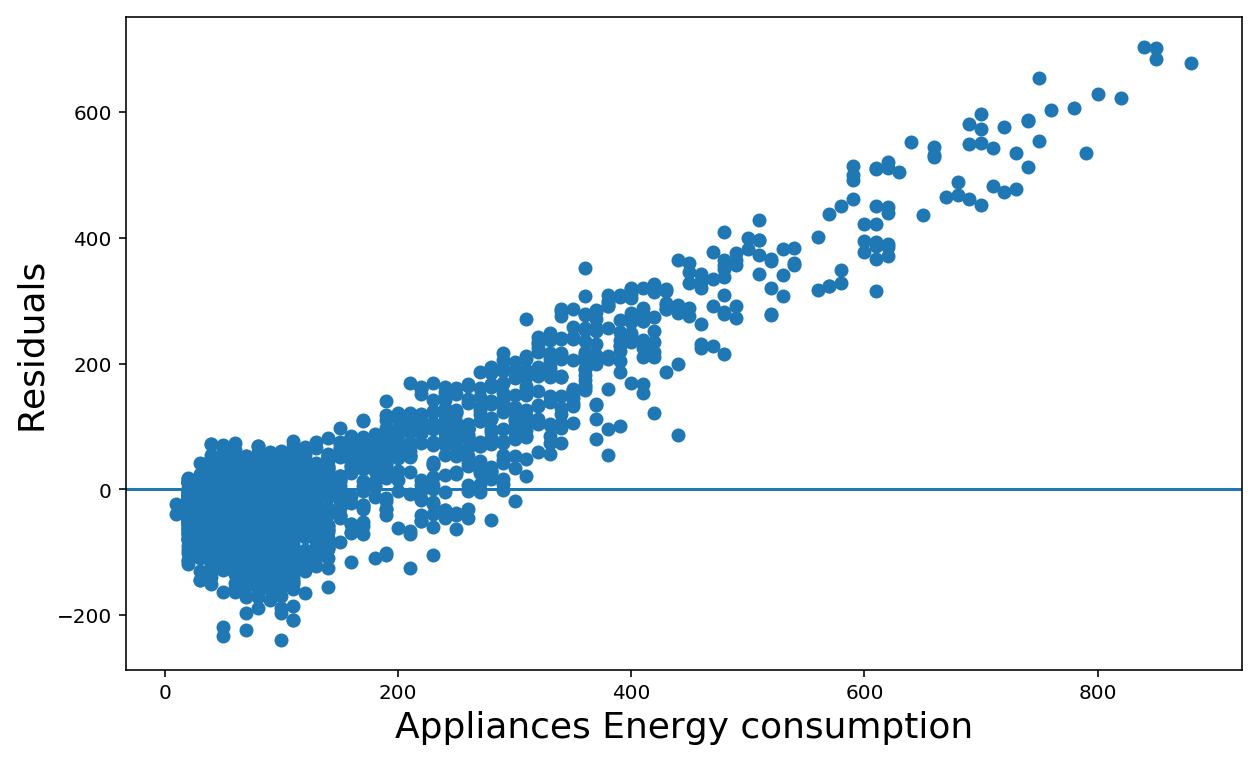

In [35]:
from Error_Metrics import ErrorMetrics

error_metrics = ErrorMetrics(X_train_, y_train, X_test_, y_test)

optimal_l1reg = Lasso(alpha=optimal_alpha)
optimal_l1reg.fit(X_train_, y_train)
test_opt_pred_l1 = optimal_l1reg.predict(X_test_)

error_metrics.cal_metric('lasso', optimal_l1reg)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test - test_opt_pred_l1, marker='o')
plt.axhline(y=0)
plt.ylabel("Residuals", fontsize=18)
plt.xlabel("Appliances Energy consumption", fontsize=18)
plt.show()

# Ridge find a good alpha using a Ridge

/Users/marcus/venv0/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.07700605786e-25 / 1.11022302463e-16
  RuntimeWarning)
/Users/marcus/venv0/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.09604444534e-25 / 1.11022302463e-16
  RuntimeWarning)
/Users/marcus/venv0/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.00341123954e-25 / 1.11022302463e-16
  RuntimeWarning)


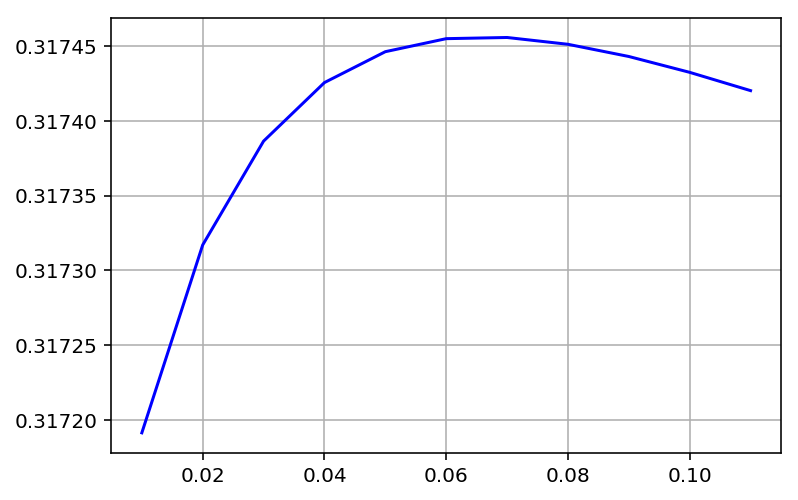

0.06999999999999999


In [45]:
#ridge
from sklearn.linear_model import  Ridge, ElasticNet
alphas_ridge = np.arange(0.01,0.12,0.01)
scores_ridge = []
for alpha in alphas_ridge:
    ridge = Ridge(fit_intercept=True, alpha=alpha)  
    this_score = np.mean(model_selection.cross_val_score(ridge, X_train_, y_train, cv=10))
    scores_ridge.append(this_score)
plt.plot(alphas_ridge, np.array(scores_ridge), '-b')
plt.grid()
plt.show()

max_score = np.max(scores_ridge)
max_score_pos = scores_ridge.index(max_score)
optimal_alpha_l2 = alphas_ridge[max_score_pos]
print optimal_alpha_l2

In [49]:
optimal_ridge = Ridge(alpha=optimal_alpha_l2)
optimal_ridge.fit(X_train_, y_train)
y_test_pre_ridge = optimal_ridge.predict(X_test_)
y_train_pre_ridge = optimal_ridge.predict(X_train_)
error_metrics.cal_metric('ridge', optimal_ridge)

In [64]:
lm.fit(X_train_, y_train)
error_metrics.cal_metric('no regularization', lm)
error_metrics.error_metric

,Model,mae_test,mae_train,mape_test,mape_train,r_test,r_train,rmse_test,rmse_train
0,lasso,50.548743,47.719088,54.854065,53.922543,0.252223,0.302998,91.815024,84.546041
0,ridge,50.183745,46.194405,55.766621,53.337758,0.306217,0.386342,88.438121,79.330397
0,no regularization,50.305300,46.264116,56.003835,53.470374,0.306722,0.386887,88.405929,79.295166


# use grid search to find good parameters for Neural Network

In [63]:
from operator import itemgetter

def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")
    
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10000,batch_size=600,
                    solver='sgd',  random_state=1,activation="logistic",learning_rate="constant")
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

param_grid = { "alpha":[.1,.01,.01],
               "momentum":[.7,.9],
               "learning_rate_init":[.1,.01,.01]
}
mlp= MLPClassifier(hidden_layer_sizes=(50,), max_iter=10000,batch_size=600,
                    solver='sgd',  random_state=1,activation="logistic",learning_rate="constant")
random_search = RandomizedSearchCV(mlp, param_distributions= param_grid,n_iter = 8, cv=5)
random_search.fit(X_train, y_train)
report(random_search.grid_scores_,10)
best = random_search.best_estimator_

print("Test set score of best nnet: %f" % best.score(X_test, y_test))
print("Best alpha: %f" % best.alpha)
print("Best momentum: %f" % best.momentum)
print("Best initial learning rate: %f" % best.learning_rate_init)

Training set score: 0.220391
Test set score: 0.224159


/Users/marcus/venv0/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Model with rank: 1
Mean validation score: 0.220 (std: 0.002)
Parameters: {'alpha': 0.01, 'learning_rate_init': 0.01, 'momentum': 0.7}

Model with rank: 2
Mean validation score: 0.220 (std: 0.002)
Parameters: {'alpha': 0.01, 'learning_rate_init': 0.1, 'momentum': 0.7}

Model with rank: 3
Mean validation score: 0.220 (std: 0.002)
Parameters: {'alpha': 0.01, 'learning_rate_init': 0.1, 'momentum': 0.9}

Model with rank: 4
Mean validation score: 0.220 (std: 0.002)
Parameters: {'alpha': 0.01, 'learning_rate_init': 0.01, 'momentum': 0.9}

Model with rank: 5
Mean validation score: 0.220 (std: 0.002)
Parameters: {'alpha': 0.01, 'learning_rate_init': 0.1, 'momentum': 0.7}

Model with rank: 6
Mean validation score: 0.220 (std: 0.002)
Parameters: {'alpha': 0.1, 'learning_rate_init': 0.01, 'momentum': 0.9}

Model with rank: 7
Mean validation score: 0.220 (std: 0.002)
Parameters: {'alpha': 0.1, 'learning_rate_init': 0.1, 'momentum': 0.7}

Model with rank: 8
Mean validation score: 0.220 (std: 0.002)


/Users/marcus/venv0/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
